# Calibration Vega

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [3]:
import pysynphot as S

In [4]:
from astropy import units as u

# To force the detector surface to be the LSST one
https://pysynphot.readthedocs.io/en/latest/ref_api.html#pysynphot.refs.setref

Key numbers:

https://www.lsst.org/scientists/keynumbers

In [5]:
 S.refs.showref()

graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
      area: 45238.93416
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True


In [6]:
# LSST
NBBANDS=6
band_to_number={'u':0,'g':1,'r':2,'i':3,'z':4,'y4':5}
band_to_number_2={'u':0,'g':1,'r':2,'i':3,'z':4,'y':5}
number_to_band={0:'u',1:'g',2:'r',3:'i',4:'z',5:'y4'}
number_to_band_2={0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}
filtercolor=['blue','green','red','orange','grey','black']
NBCOLORS=NBBANDS-1
number_to_color={0:'U-G',1:'G-R',2:'R-I',3:'I-Z',4:'Z-Y'}
color_to_number={'U-G':0,'G-R':1,'R-I':2,'I-Z':3,'Z-Y':4}
mpl_colors_col=['b','g','r','y','k']

WLMIN=3000. # Minimum wavelength : PySynPhot works with Angstrom
WLMAX=11000. # Minimum wavelength : PySynPhot works with Angstrom

NBINS=int(WLMAX-WLMIN) # Number of bins between WLMIN and WLMAX
BinWidth=(WLMAX-WLMIN)/float(NBINS) # Bin width in Angstrom
WL=np.linspace(WLMIN,WLMAX,NBINS)   # Array of wavelength in Angstrom

In [7]:
# my old way to get effective surface
LSST_COLL_SURF=35*(u.m)**2/(u.cm)**2  # LSST collectif surface
LSST_COLL_SURF.decompose()

<Quantity 350000.>

In [8]:
# from key numbers
Deff=642.3 # effective radius in cm
Seff= np.pi*Deff**2/4  # in cm2
Seff

324015.4546769212

In [9]:
S.refs.setref(area=Seff, waveset=None) # set by default to 6.4230 m2

In [10]:
#S.refs.setref(area=LSST_COLL_SURF.decompose(), waveset=None)
S.refs.set_default_waveset(minwave=WLMIN, maxwave=WLMAX, num=NBINS, delta=BinWidth, log=False)
S.refs.showref()

EXPOSURE=30.0                      # LSST Exposure time

graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
      area: 324015.4546769212
   waveset: Min: 3000.0, Max: 11000.0, Num: None, Delta: 1.0, Log: False


In [11]:
 S.refs.showref()

graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
      area: 324015.4546769212
   waveset: Min: 3000.0, Max: 11000.0, Num: None, Delta: 1.0, Log: False


In [12]:
pysynphot_root_path=os.environ['PYSYN_CDBS']

In [13]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(10,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [14]:
XMIN=3000.
XMAX=11000.

# Set the primary mirror surface by default

# Constants

$$
    m_{AB} = -2.5 \times \log_{10} \left( \frac{f_\nu}{3631 Jy} \right) 
$$

$$
   1 Jy = 10^{−26} W . Hz^{−1} . m^{−2} = 10^{−23} erg . s^{−1} . Hz^{−1} . cm^{−2} 
$$

$$
     m_{AB} = -2.5 \times \log_{10} \left( \frac{f_\nu}{1 Jy} \right) + 8.5
$$

$$
     m_{AB} = -2.5 \times \log_{10} ( f_\nu ) - 48.6
$$

When $f_\nu$ is expressed in  $erg.s^{−1}.cm^{−2} . Hz^{−1}$

In [15]:
S.units.ABZERO

-48.6

In [16]:
S.units.STZERO

-21.1

In [17]:
# Angstrom per second
S.units.C

2.99792458e+18

In [18]:
# erg.s
S.units.H

6.6262e-27

# SED in flam Units:

  $$ 
  erg/s/cm^2/A 
  $$

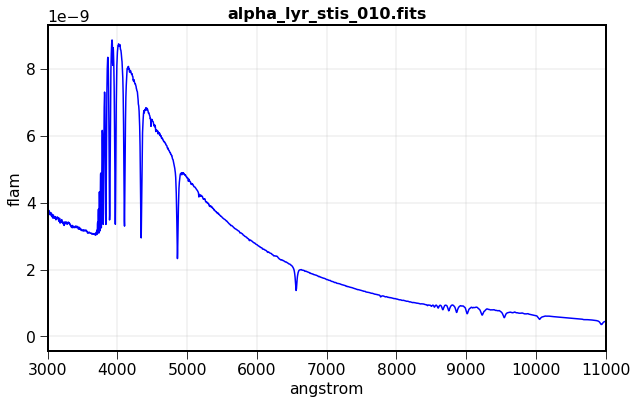

In [19]:
spec_vega=S.Vega
#spec_vega.convert("nm")

plt.plot(spec_vega.wave, spec_vega.flux,"b-")
plt.xlabel(spec_vega.waveunits)
plt.ylabel(spec_vega.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()

# SED in Vega Units:

$$
 M= −2.5 \times \log(flux/flux_{Vega})
$$

In [20]:
spec_vega.convert("vegamag")

/Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/units.py:913: RuntimeWarning: invalid value encountered in true_divide
  normalized = flux / resampled._fluxtable


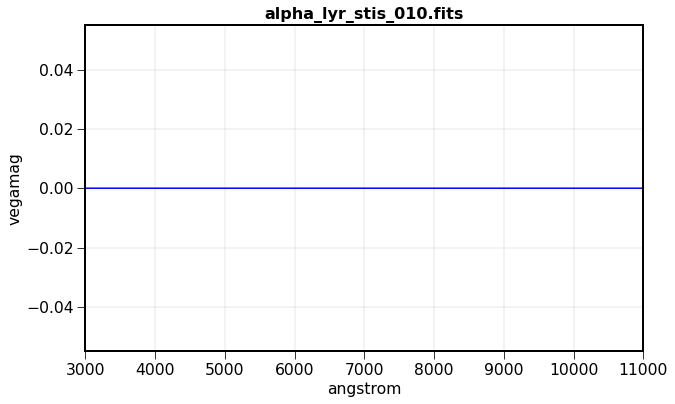

In [21]:
plt.plot(spec_vega.wave, spec_vega.flux,"b-")
plt.xlabel(spec_vega.waveunits)
plt.ylabel(spec_vega.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()

# SED in photlam Units:

  $$ 
  photons/s/cm^2/A
  $$

In [22]:
spec_vega.convert("photlam")

flat_nu = S.FlatSpectrum(0, fluxunits='abmag')
flat_lambda=S.FlatSpectrum(0, fluxunits='stmag')

flat_nu.convert("photlam")
flat_lambda.convert("photlam")

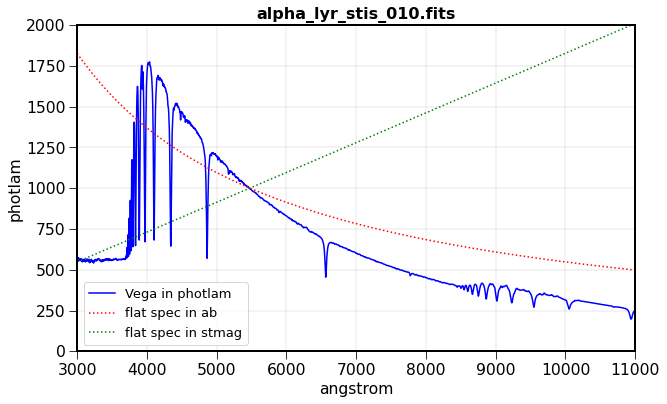

In [23]:

plt.plot(spec_vega.wave, spec_vega.flux,"b-",label="Vega in photlam")
plt.xlabel(spec_vega.waveunits)
plt.ylabel(spec_vega.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.ylim(0,2000)
plt.grid()

plt.plot(flat_nu.wave,flat_nu.flux,"r:",label="flat spec in ab")
plt.plot(flat_lambda.wave,flat_lambda.flux,"g:",label="flat spec in stmag")

plt.legend()

# Observation in standard Johnson filters witout atmosphere

https://pysynphot.readthedocs.io/en/latest/units.html

In [24]:
bp_v = S.ObsBandpass('johnson,v')
bp_u = S.ObsBandpass('johnson,u')
bp_b = S.ObsBandpass('johnson,b')
bp_r = S.ObsBandpass('johnson,r')
bp_i = S.ObsBandpass('johnson,i')

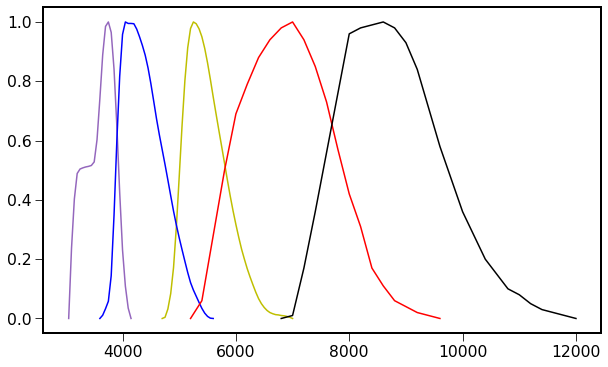

In [25]:
plt.plot(bp_v.wave,bp_v.throughput,"y-")
plt.plot(bp_u.wave,bp_u.throughput,"-",color="tab:purple")
plt.plot(bp_b.wave,bp_b.throughput,"b-")
plt.plot(bp_r.wave,bp_r.throughput,"r-")
plt.plot(bp_i.wave,bp_i.throughput,"k-")

In [26]:
obs_v = S.Observation(spec_vega, bp_v)
obs_u = S.Observation(spec_vega, bp_u)
obs_b = S.Observation(spec_vega, bp_b)
obs_r = S.Observation(spec_vega, bp_r)
obs_i = S.Observation(spec_vega, bp_i)

(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


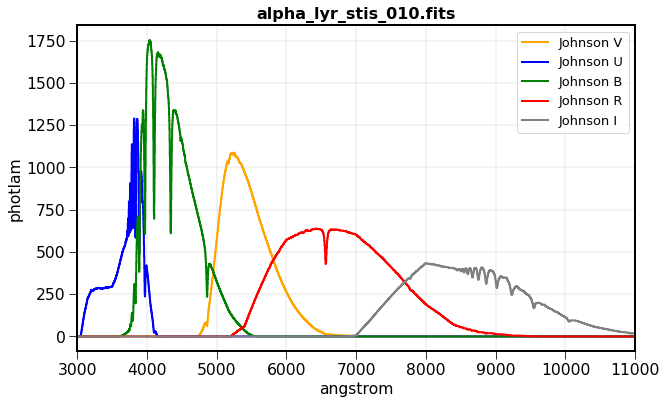

In [27]:
plt.plot(obs_v.binwave, obs_v.binflux, drawstyle='steps-mid',color="orange",lw=2,label="Johnson V")
plt.plot(obs_u.binwave, obs_u.binflux, drawstyle='steps-mid',color="blue",lw=2,label="Johnson U")
plt.plot(obs_b.binwave, obs_b.binflux, drawstyle='steps-mid',color="green",lw=2,label="Johnson B")
plt.plot(obs_r.binwave, obs_r.binflux, drawstyle='steps-mid',color="red",lw=2,label="Johnson R")
plt.plot(obs_i.binwave, obs_i.binflux, drawstyle='steps-mid',color="grey",lw=2,label="Johnson I")
plt.xlabel(obs_v.waveunits)
plt.ylabel(obs_v.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()
plt.legend()

In [28]:
print(obs_v.primary_area)

None


In [29]:
obs_v.convert('counts')

In [30]:
obs_v.countrate()

277700094632.74976

In [31]:
obs_b.countrate()

415322724202.5296

In [32]:
obs_u.countrate()

146324841296.6219

# Perfect filters

In [33]:
filt_wlcenter=np.arange(3500,10500,500)

In [34]:
delta_W=10

In [35]:
filt_wlcenter

array([ 3500,  4000,  4500,  5000,  5500,  6000,  6500,  7000,  7500,
        8000,  8500,  9000,  9500, 10000])

In [36]:
NBWL=len(filt_wlcenter)

In [37]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBWL)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBWL), alpha=1)

In [38]:
all_bp=[]
all_obs=[]
for wl in filt_wlcenter:
    thebp= bp = S.Box(wl, delta_W)
    theobs=S.Observation(spec_vega,thebp)
    all_bp.append(thebp)
    all_obs.append(theobs)

(<pysynphot.spectrum.Box object at 0x7fb6ce15eb10>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6ce157d10>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfd4450>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfd4550>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfcf1d0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfb9850>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfb96d0>) does not have a de

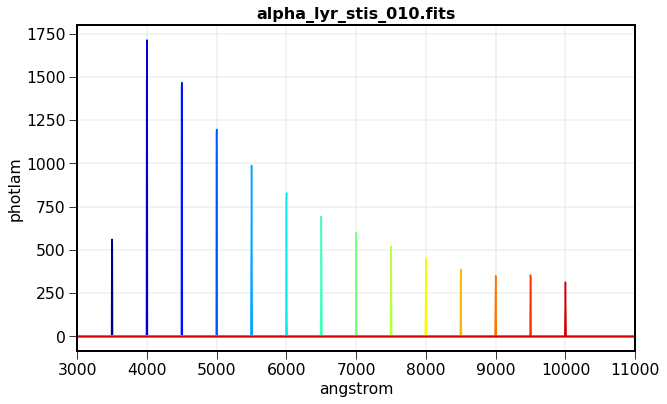

In [39]:
idx=0
for theobs in all_obs:
    plt.plot(theobs.binwave,theobs.binflux,color=all_colors[idx])
    idx+=1
    
plt.xlabel(theobs.waveunits)
plt.ylabel(theobs.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()
#plt.legend()

# dedicated measured points

In [40]:
filt_wlcenter=np.array([3600.,4400.,5500.,7100.,9700.])

In [41]:
NBWL=len(filt_wlcenter)

In [42]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBWL)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBWL), alpha=1)

In [43]:
all_bp=[]
all_obs=[]
for wl in filt_wlcenter:
    thebp= bp = S.Box(wl, delta_W)
    theobs=S.Observation(spec_vega,thebp)
    all_bp.append(thebp)
    all_obs.append(theobs)

(<pysynphot.spectrum.Box object at 0x7fb6cdfac610>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfd4f90>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cdfb98d0>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6cf038190>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(<pysynphot.spectrum.Box object at 0x7fb6ce163190>) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


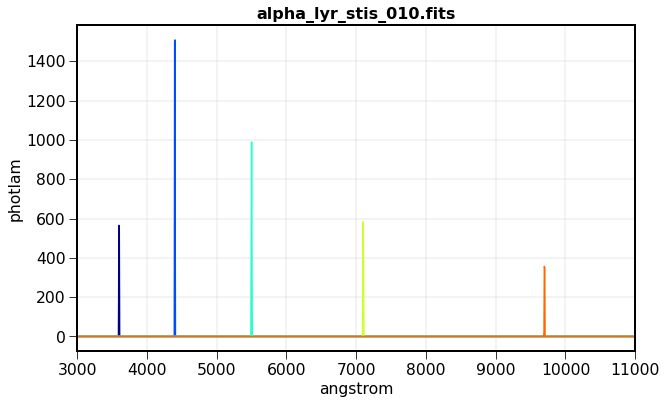

In [44]:
idx=0
for theobs in all_obs:
    plt.plot(theobs.binwave,theobs.binflux,color=all_colors[idx])
    idx+=1
    
plt.xlabel(theobs.waveunits)
plt.ylabel(theobs.fluxunits)
plt.title(os.path.basename(spec_vega.name))
plt.xlim(XMIN,XMAX)
plt.grid()
#plt.legend()

# Results in filter bands

Units are defined in 
https://pysynphot.readthedocs.io/en/latest/units.html#pysynphot-units-counts-mags

## Countrate

In [45]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, count-rate=",theobs.countrate()," photons/s")
    print("wl=",filt_wlcenter[idx]," A, \t ==> instrum magnitude=",-2.5*np.log10(theobs.countrate())," obmag")
    idx+=1

wl= 3600.0  A, count-rate= 1826938845.6713476  photons/s
wl= 3600.0  A, 	 ==> instrum magnitude= -23.1543100254257  obmag
wl= 4400.0  A, count-rate= 4873696067.144184  photons/s
wl= 4400.0  A, 	 ==> instrum magnitude= -24.219646105680525  obmag
wl= 5500.0  A, count-rate= 3204380794.646028  photons/s
wl= 5500.0  A, 	 ==> instrum magnitude= -23.76436030035539  obmag
wl= 7100.0  A, count-rate= 1889791368.722304  photons/s
wl= 7100.0  A, 	 ==> instrum magnitude= -23.191034652742687  obmag
wl= 9700.0  A, count-rate= 1153801779.396889  photons/s
wl= 9700.0  A, 	 ==> instrum magnitude= -22.655328010982537  obmag


## OBmag : Instrumental magnitude

the instrumental magnitude that is the logarithmic form of counts
https://pysynphot.readthedocs.io/en/latest/units.html#pysynphot-units-counts-mags

In [46]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in obmag units = ",theobs.effstim("obmag"),"obmag")
    idx+=1

wl= 3600.0  A, magnitude in obmag units =  -23.1543100254257 obmag
wl= 4400.0  A, magnitude in obmag units =  -24.219646105680525 obmag
wl= 5500.0  A, magnitude in obmag units =  -23.76436030035539 obmag
wl= 7100.0  A, magnitude in obmag units =  -23.191034652742687 obmag
wl= 9700.0  A, magnitude in obmag units =  -22.655328010982537 obmag


## VEGAmag

In [47]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in vega units = ",theobs.effstim("vegamag"),"vegamag")
    idx+=1

wl= 3600.0  A, magnitude in vega units =  0.0 vegamag
wl= 4400.0  A, magnitude in vega units =  0.0 vegamag
wl= 5500.0  A, magnitude in vega units =  0.0 vegamag
wl= 7100.0  A, magnitude in vega units =  0.0 vegamag
wl= 9700.0  A, magnitude in vega units =  0.0 vegamag


## ABmag

In [48]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in abmag units = ",theobs.effstim("abmag"),"abmag")
    idx+=1

wl= 3600.0  A, magnitude in abmag units =  1.0781888919027764 abmag
wl= 4400.0  A, magnitude in abmag units =  -0.20502313261414962 abmag
wl= 5500.0  A, magnitude in abmag units =  0.007987225187624958 abmag
wl= 7100.0  A, magnitude in abmag units =  0.3040733826912678 abmag
wl= 9700.0  A, magnitude in abmag units =  0.5009962723150245 abmag


## STmag

In [49]:
idx=0
for theobs in all_obs:
    print("wl=",filt_wlcenter[idx]," A, magnitude in stmag units = ",theobs.effstim("stmag"),"stmag")
    idx+=1

wl= 3600.0  A, magnitude in stmag units =  0.16764592434878622 stmag
wl= 4400.0  A, magnitude in stmag units =  -0.679814442432642 stmag
wl= 5500.0  A, magnitude in stmag units =  0.017746642171113436 stmag
wl= 7100.0  A, magnitude in stmag units =  0.8683116602760208 stmag
wl= 9700.0  A, magnitude in stmag units =  1.7428019708493387 stmag


# Observation of Vega  in LSST

## LSST filters

In [50]:
df=pd.read_csv("lsst_throughput.csv",index_col=0)

In [51]:
df

,wl,u,g,r,i,z,y
0,300,0.000711,0.000000,0.000000,0.000034,0.000000,0.000000
1,301,0.000440,0.000000,0.000000,0.000155,0.000000,0.000000
2,302,0.000591,0.000000,0.000000,0.000072,0.000000,0.000000
3,303,0.000022,0.000000,0.000000,0.000034,0.000000,0.000000
4,304,0.000229,0.000000,0.000000,0.000034,0.000000,0.000000
...,...,...,...,...,...,...,...
896,1196,0.000029,0.000298,0.000088,0.000121,0.000560,0.016426
897,1197,0.000024,0.000357,0.000084,0.000150,0.000630,0.016413
898,1198,0.000016,0.000427,0.000080,0.000187,0.000711,0.016397
899,1199,0.000012,0.000501,0.000076,0.000235,0.000802,0.016303


## Convert in passband à la pysynphot

In [52]:
all_bp=[]
for filter_name in band_to_number_2.keys():
    bp = S.ArrayBandpass(df["wl"].values*10., df[filter_name].values, name=filter_name) # convert in angstrom
    all_bp.append(bp)

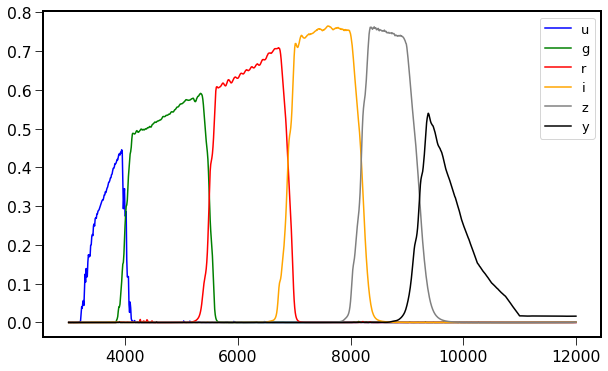

In [53]:
for bp in all_bp:
    plt.plot(bp.wave,bp.throughput,"-",color=filtercolor[band_to_number_2[bp.name]],label=bp.name)
plt.legend()    

## choose an atmosphere

In [54]:
file_atm="libradtran_out/RT_MPL_pp_us_sa_rtvis_z10_wv40_oz30_cld0000.OUT"

In [55]:
arr=np.loadtxt(file_atm)

In [56]:
wl_atm=arr[:,0]
trans_atm=arr[:,1]

In [57]:
bp_atm=S.ArrayBandpass(wl_atm*10., trans_atm, name="atm, airmass 1.0")

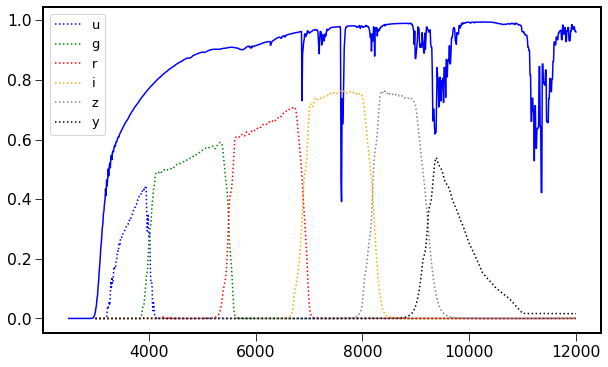

In [58]:
plt.plot(bp_atm.wave,bp_atm.throughput,"b-")
for bp in all_bp:
    plt.plot(bp.wave,bp.throughput,":",color=filtercolor[band_to_number_2[bp.name]],label=bp.name)
plt.legend()  

## Create combined passband

In [59]:
all_bp_atm=[]

for bp in all_bp:
    bp_new=bp*bp_atm
    all_bp_atm.append(bp_new)

(0.0, 1.1)

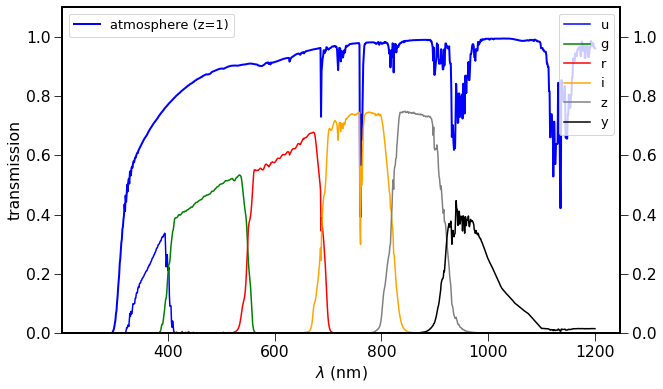

In [82]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.plot(bp_atm.wave/10,bp_atm.throughput,"b-",lw=2,label="atmosphere (z=1)")
ax.set_ylim(0,1.1)
ax.legend(loc="upper left")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")

ax2=ax.twinx()

idx=0
for bp in all_bp_atm:
    ax2.plot(bp.wave/10,bp.throughput,"-",color=filtercolor[idx],label=number_to_band_2[idx])
    idx+=1
ax2.legend()    
ax2.set_ylim(0,1.1)



# Observation of Vega

In [61]:
spec_vega.convert("photlam")

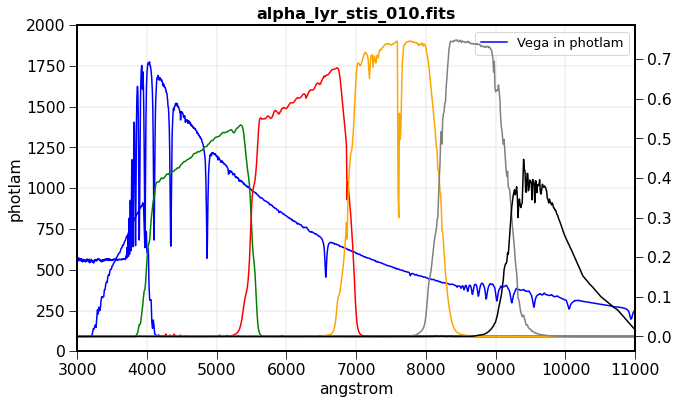

In [62]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.plot(spec_vega.wave, spec_vega.flux,"b-",label="Vega in photlam")
ax.set_xlabel(spec_vega.waveunits)
ax.set_ylabel(spec_vega.fluxunits)
ax.set_title(os.path.basename(spec_vega.name))
ax.set_xlim(XMIN,XMAX)
ax.set_ylim(0,2000)
ax.grid()
ax.legend()

ax2=ax.twinx()
idx=0
for bp in all_bp_atm:
    ax2.plot(bp.wave,bp.throughput,"-",color=filtercolor[idx],label=bp.name)
    idx+=1
#ax2.legend() 

In [63]:
all_obs=[]
for bp in all_bp_atm:
    obs = S.Observation(spec_vega, bp)
    all_obs.append(obs)

((u * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [64]:
for obs in all_obs:
    print("observation {} : {:2.3e} ".format(obs.name,obs.countrate()))

observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * (u * atm, airmass 1.0) : 5.113e+10 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * (g * atm, airmass 1.0) : 2.861e+11 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * (r * atm, airmass 1.0) : 2.156e+11 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * (i * atm, airmass 1.0) : 1.582e+11 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * (z * atm, airmass 1.0) : 9.684e+10 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * (y * atm, airmass 1.0) : 5.448e+10 


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Bad in counts')

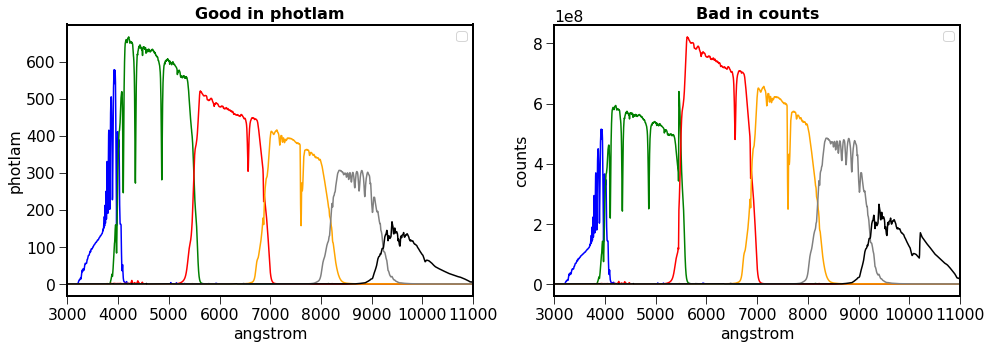

In [65]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(121)
idx=0
for obs in all_obs:
    obs.convert('photlam')
    ax.plot(obs.binwave, obs.binflux,"-",color=filtercolor[idx])

    idx+=1
ax.legend()   
ax.set_ylabel(obs.fluxunits)
ax.set_xlabel(obs.waveunits)
ax.set_xlim(XMIN,XMAX)
ax.set_title("Good in photlam")


ax=fig.add_subplot(122)
idx=0
for obs in all_obs:
    obs.convert('counts')
    ax.plot(obs.binwave, obs.binflux,"-",color=filtercolor[idx])

    idx+=1
ax.legend()   
ax.set_ylabel(obs.fluxunits)
ax.set_xlabel(obs.waveunits)
ax.set_xlim(XMIN,XMAX)
ax.set_title("Bad in counts")


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Bad in counts x Exposure')

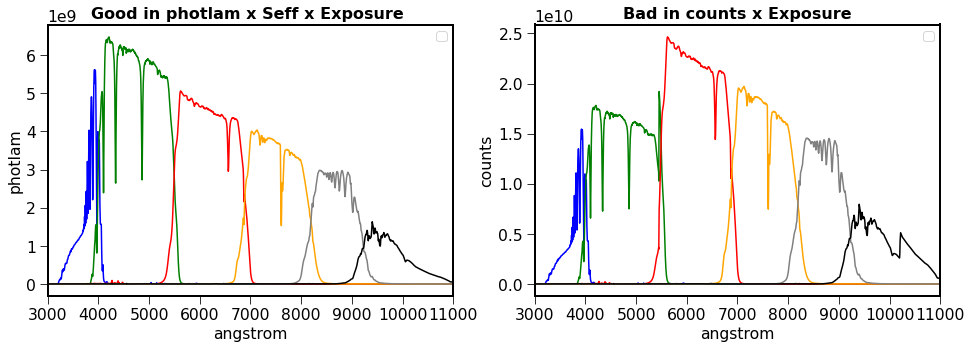

In [66]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(121)
idx=0
for obs in all_obs:
    obs.convert('photlam')
    ax.plot(obs.binwave, obs.binflux*Seff*EXPOSURE,"-",color=filtercolor[idx])

    idx+=1
ax.legend()   
ax.set_ylabel(obs.fluxunits)
ax.set_xlabel(obs.waveunits)
ax.set_xlim(XMIN,XMAX)
ax.set_title("Good in photlam x Seff x Exposure ")


ax=fig.add_subplot(122)
idx=0
for obs in all_obs:
    obs.convert('counts')
    ax.plot(obs.binwave, obs.binflux*EXPOSURE,"-",color=filtercolor[idx])

    idx+=1
ax.legend()   
ax.set_ylabel(obs.fluxunits)
ax.set_xlabel(obs.waveunits)
ax.set_xlim(XMIN,XMAX)
ax.set_title("Bad in counts x Exposure")


# Renormalize Vega at 24 mag

In [67]:
sp_norm = spec_vega.renorm(24, 'abmag', S.ObsBandpass('johnson,v'))

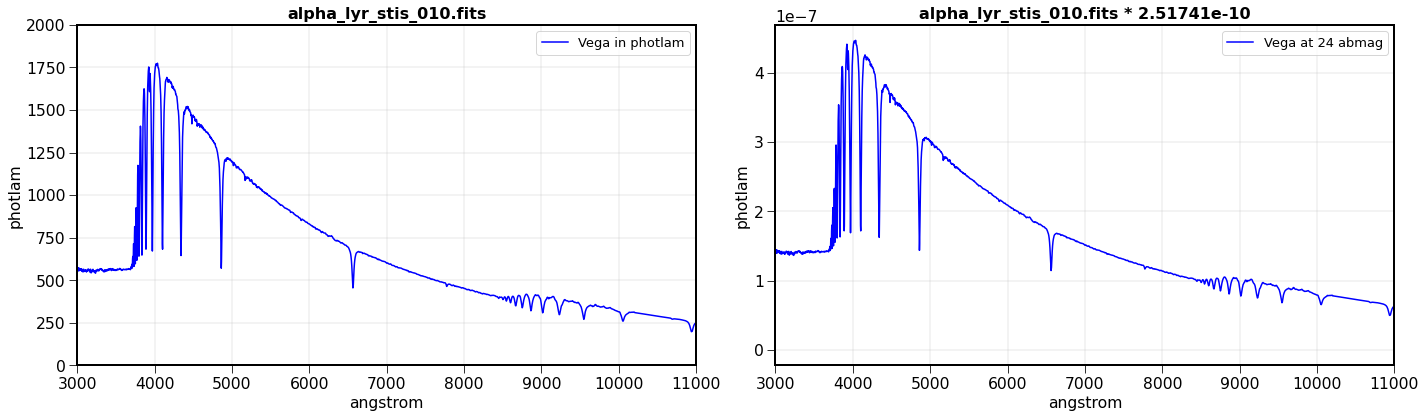

In [68]:
fig=plt.figure(figsize=(20,6))

ax=fig.add_subplot(121)

ax.plot(spec_vega.wave, spec_vega.flux,"b-",label="Vega in photlam")
ax.set_xlabel(spec_vega.waveunits)
ax.set_ylabel(spec_vega.fluxunits)
ax.set_title(os.path.basename(spec_vega.name))
ax.set_xlim(XMIN,XMAX)
ax.set_ylim(0,2000)
ax.grid()
ax.legend()


ax=fig.add_subplot(122)

ax.plot(sp_norm.wave, sp_norm.flux,"b-",label="Vega at 24 abmag")
ax.set_xlabel(sp_norm.waveunits)
ax.set_ylabel(sp_norm.fluxunits)
ax.set_title(os.path.basename(sp_norm.name))
ax.set_xlim(XMIN,XMAX)
ax.grid()
ax.legend()

plt.tight_layout()

In [69]:
all_obs_renorm=[]
for bp in all_bp_atm:
    obs = S.Observation(sp_norm, bp)
    all_obs_renorm.append(obs)

((u * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * atm, airmass 1.0)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [70]:
for obs in all_obs_renorm:
    print("observation {} : {:2.3e} ".format(obs.name,obs.countrate()))

observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * 2.51741e-10 * (u * atm, airmass 1.0) : 1.287e+01 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * 2.51741e-10 * (g * atm, airmass 1.0) : 7.203e+01 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * 2.51741e-10 * (r * atm, airmass 1.0) : 5.428e+01 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * 2.51741e-10 * (i * atm, airmass 1.0) : 3.983e+01 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * 2.51741e-10 * (z * atm, airmass 1.0) : 2.438e+01 
observation /Users/dagoret/anaconda3/lib/python3.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_010.fits * 2.51741e-10 * (y * atm, airmass 1.0) : 1.372e+01 


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Bad in counts')

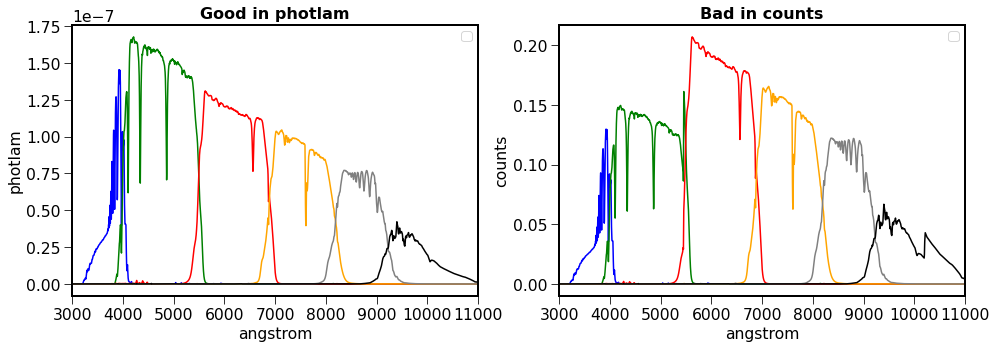

In [71]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(121)
idx=0
for obs in all_obs_renorm:
    obs.convert('photlam')
    ax.plot(obs.binwave, obs.binflux,"-",color=filtercolor[idx])

    idx+=1
ax.legend()   
ax.set_ylabel(obs.fluxunits)
ax.set_xlabel(obs.waveunits)
ax.set_xlim(XMIN,XMAX)
ax.set_title("Good in photlam")


ax=fig.add_subplot(122)
idx=0
for obs in all_obs_renorm:
    obs.convert('counts')
    ax.plot(obs.binwave, obs.binflux,"-",color=filtercolor[idx])

    idx+=1
ax.legend()   
ax.set_ylabel(obs.fluxunits)
ax.set_xlabel(obs.waveunits)
ax.set_xlim(XMIN,XMAX)
ax.set_title("Bad in counts")
